In [1]:
cd Measurement-automation/

/home/gleb/Документы/Science/Статьи/Machine vision/Measurement-automation


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.patches as patches
from matplotlib import ticker, colorbar as clb

%cd .. 
# from parula import *
%cd Measurement-automation/

from importlib import reload
from resonator_tools.circuit import notch_port

import scipy
from scipy.signal import correlate, find_peaks
from scipy.optimize import *

rc("font", **{"size":14})

mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

%load_ext snakeviz

import lib2

from lib2.MeasurementResult import *

/home/gleb/Документы/Science/Статьи/Machine vision
/home/gleb/Документы/Science/Статьи/Machine vision/Measurement-automation


In [4]:
# reload(lib2.ResonatorDetector)
# reload(lib2.fulaut.AnticrossingOracle)
from lib2.fulaut.AnticrossingOracle import AnticrossingOracle

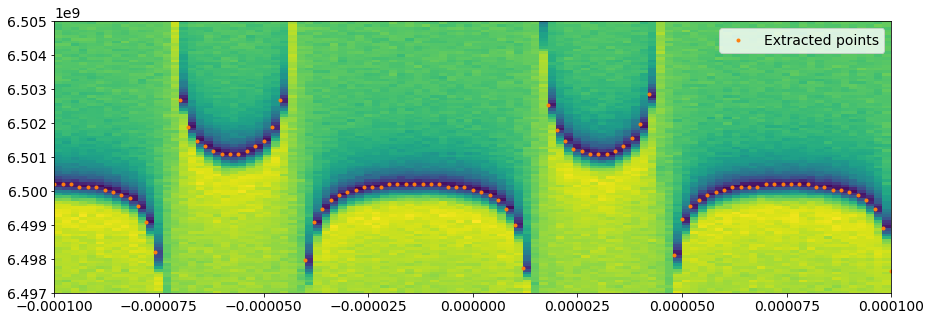

In [5]:
anti0 = MeasurementResult.load("BMSTU Clean 3", "I-anticrossing")
ao0 = AnticrossingOracle("transmon", anti0, plot=True, fast_res_detect=False, hints=[])

In [6]:
anti1 = MeasurementResult.load("BMSTU Clean 3", "VI-anticrossing")
data_dict = anti1.get_data()
# data_dict["data"] = data_dict["data"]*exp(2j*pi*65e-9*freqs) +\
#         1e-2*(random.normal(size = data_dict["data"].shape)\
#                         +1j*random.normal(size = data_dict["data"].shape))
# # data_dict["data"] = S21s*exp(2j*pi*65e-9*freqs)

# anti.set_data(data_dict)

In [7]:
anti2 = MeasurementResult.load("Xmon 2Q", "III-anticrossing")
# data_dict = anti2.get_data()
# data_dict["data"] = data_dict["data"]+\
#         2e-2*(random.normal(size = data_dict["data"].shape)\
#                         +1j*random.normal(size = data_dict["data"].shape))
    
# data_dict["data"] = (savgol_filter(real(S21s), 21, 2)\
#                                 + 1j*savgol_filter(imag(S21s), 21, 2))
# data_dict["data"] = S21s*exp(2j*pi*65e-9*freqs)
# anti.set_data(data_dict)


/home/gleb/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:436: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


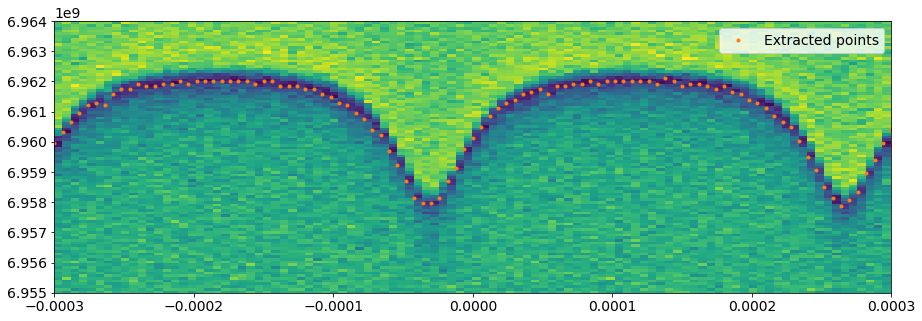

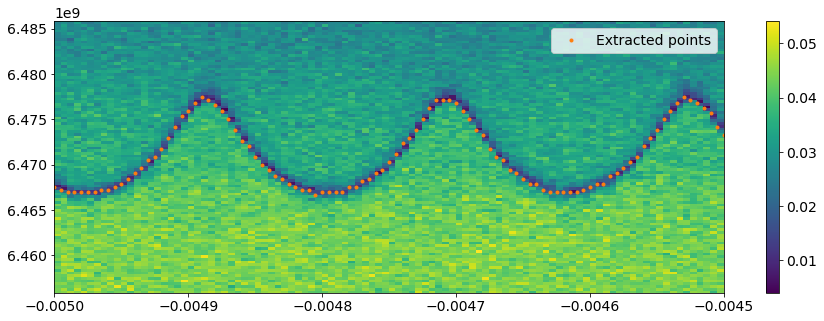

In [8]:
ao = AnticrossingOracle("transmon", anti1, plot=True, hints=["fqmax_above"])
ao2 = AnticrossingOracle("transmon", anti2, plot=True, hints=[])
plt.colorbar()

6.4710e+09, 3.9945e+07, 1.7999e-04, -1.1765e-04, 8.5104e+09, 3.9984e-01 loss: 3.02 MHz


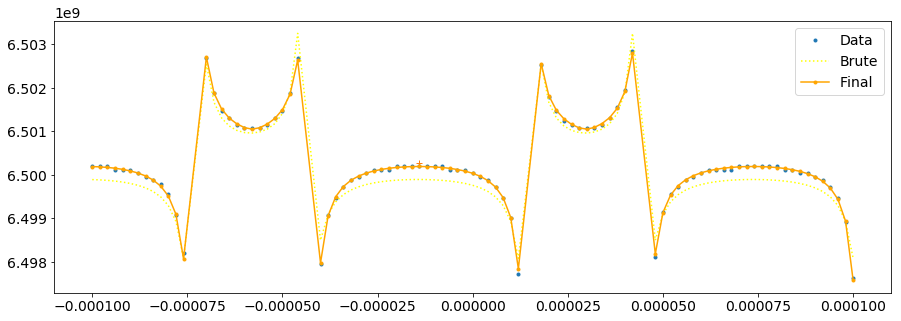

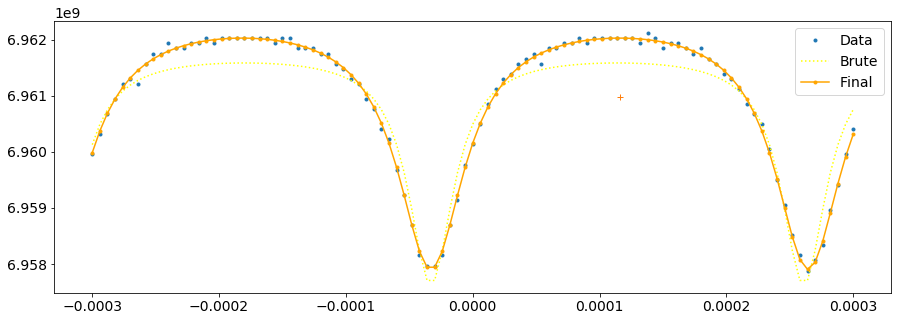

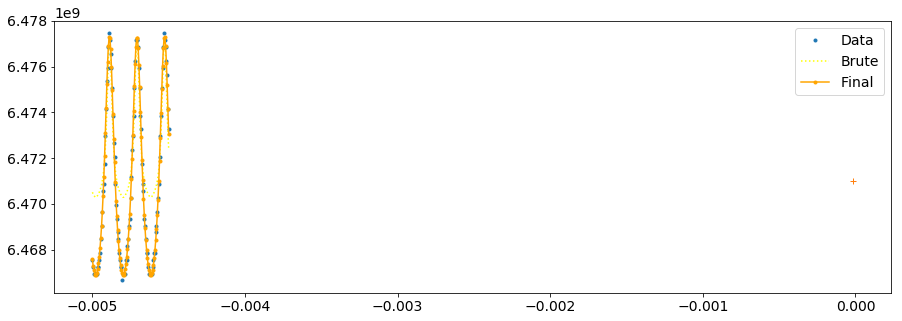

In [9]:
result0 = ao0.launch()
result1 = ao.launch()
result2 = ao2.launch()

In [69]:
result2

(array([ 6.46445996e+09,  8.65323836e+07,  1.80505504e-04, -1.44779965e-05,
         5.89452097e+09,  3.25003845e-01]), 0.15756084878993645)

In [10]:
rcParams['axes.formatter.offset_threshold'] = 2

'STIX-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'STIX-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


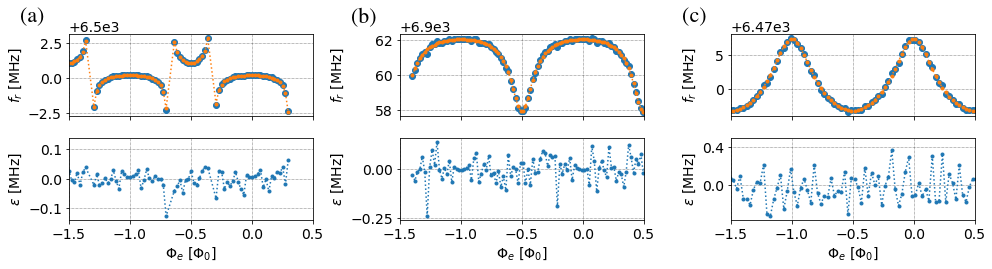

In [28]:
plt.subplot2grid((2, 3), (0, 0), rowspan=1, colspan=1)

x = (ao0._res_points[:,0]-result0[0][3])/result0[0][2]-1

plot(x, ao0._res_points[:,1]/1e6, marker="o", linestyle="", label="Extracted");
plot(x, ao0._model_fast(ao0._res_points[:,0], ao0._opt_params)/1e6, marker=".", linestyle=":")

plt.xlim(-1.5,.5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.gca().set_xticklabels([])

plt.ylabel("$f_r$ [MHz]")

plt.text(-1.9, 6.504e3, "(a)", fontdict={"name":"STIX"}, fontsize=22)

plt.grid()

########## Error 0
plt.subplot2grid((2, 3), (1, 0), rowspan=1, colspan=1)


plot(x, ao0._res_points[:,1]/1e6 - ao0._model_fast(ao0._res_points[:,0], ao0._opt_params)/1e6,\
                 marker=".", linestyle=":", label="Extracted");

plt.xlim(-1.5,.5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.xlabel("$\Phi_e$ [$\Phi_0$]")

plt.ylabel(r"$\varepsilon$ [MHz]")

plt.grid()

######### Fit 1
plt.subplot2grid((2, 3), (0, 1), rowspan=1, colspan=1)

x = (ao._res_points[:,0]-result1[0][3])/result1[0][2]

plot(x, ao._res_points[:,1]/1e6, marker="o", linestyle="", label="Extracted");
plot(x, ao._model_fast(ao._res_points[:,0], ao._opt_params)/1e6, marker=".", linestyle=":")

plt.xlim(-1.5,.5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.gca().set_xticklabels([])

plt.ylabel("$f_r$ [MHz]")
# plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(1))


plt.text(-1.9, 6.963e3, "(b)", fontdict={"name":"STIX"}, fontsize=22)

ax = gca().get_yaxis().get_major_formatter()
ax.set_useOffset(True)
plt.grid()

######## Error 1
plt.subplot2grid((2, 3), (1, 1), rowspan=1, colspan=1)


plot(x, ao._res_points[:,1]/1e6 - ao._model_fast(ao._res_points[:,0], ao._opt_params)/1e6,\
                 marker=".", linestyle=":", label="Extracted");

plt.xlim(-1.5,.5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.xlabel("$\Phi_e$ [$\Phi_0$]")

plt.ylabel(r"$\varepsilon$ [MHz]")

plt.grid()


######### Fit 2
plt.subplot2grid((2, 3), (0, 2), rowspan=1, colspan=1)

x = (ao2._res_points[:,0]-result2[0][3])/result2[0][2]+26

plot(x, ao2._res_points[:,1]/1e6, marker="o", linestyle="", label="Extracted");
plot(x, ao2._model_fast(ao2._res_points[:,0], ao2._opt_params)/1e6, marker=".", linestyle=":")

plt.xlim(-1.5,.5)
plt.gca().set_xticklabels([])

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))

plt.ylabel("$f_r$ [MHz]")
# plt.ylim(6.5125, 6.514)
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=0.001))
ax = gca().get_yaxis().get_major_formatter()
ax.set_useOffset(True)

plt.text(-1.9, 6.47975e3, "(с)", fontdict={"name":"STIX"}, fontsize=22)

plt.grid()

######## Error 2
plt.subplot2grid((2, 3), (1, 2), rowspan=1, colspan=1)


plot(x, ao2._res_points[:,1]/1e6 - ao2._model_fast(ao2._res_points[:,0], ao2._opt_params)/1e6,\
                 marker=".", linestyle=":", label="Extracted");

plt.xlim(-1.5,.5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.xlabel("$\Phi_e$ [$\Phi_0$]")

plt.ylabel(r"$\varepsilon$ [MHz]")
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(2))


plt.grid()
gcf().set_size_inches(14,4)
plt.tight_layout()
plt.gcf().align_ylabels()
plt.savefig("../Pictures/fit_cases.pdf", bbox_inches="tight")

In [74]:
ao2._loss

0.15756084878993645

In [75]:
anti = MeasurementResult.load("Xmon-043-3", "VI-anticrossing_fit-fail")
data_dict = anti.get_data()
# data_dict["data"] = data_dict["data"]*exp(2j*pi*65e-9*freqs) +\
#         1e-2*(random.normal(size = data_dict["data"].shape)\
#                         +1j*random.normal(size = data_dict["data"].shape))
# # data_dict["data"] = S21s*exp(2j*pi*65e-9*freqs)

# anti.set_data(data_dict)

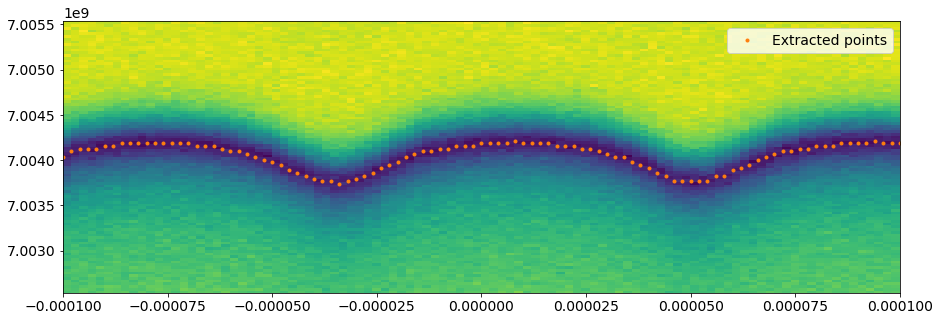

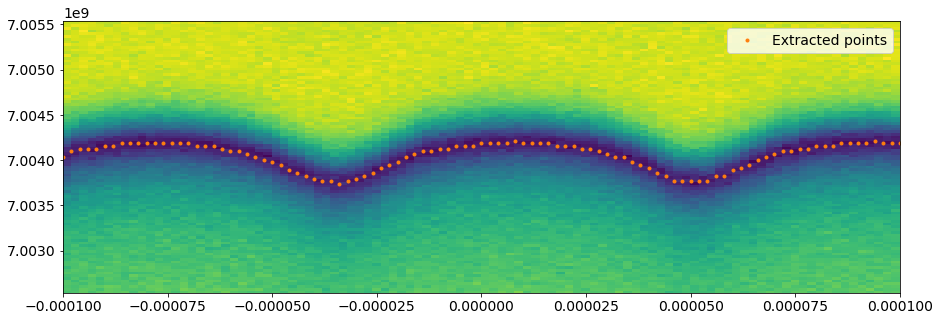

In [79]:
ao_above = AnticrossingOracle("transmon", anti, plot=True, hints=["fqmax_above"])
ao_below = AnticrossingOracle("transmon", anti, plot=True, hints=["fqmax_below"])

7.0045e+09, 2.7009e+07, 8.5620e-05, 7.6581e-06, 9.2804e+09, 7.3697e-01 loss: 0.01 MHz


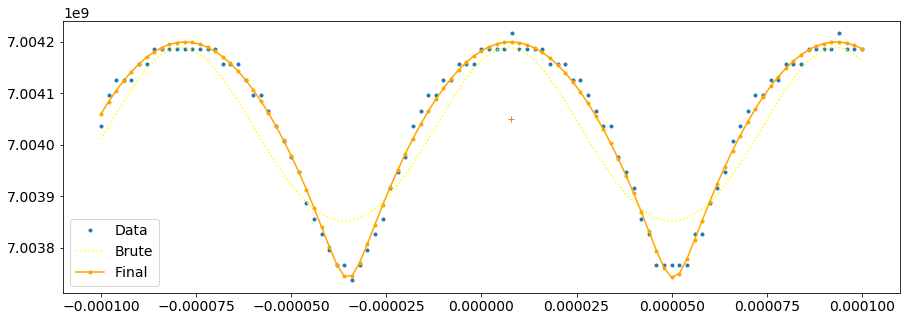

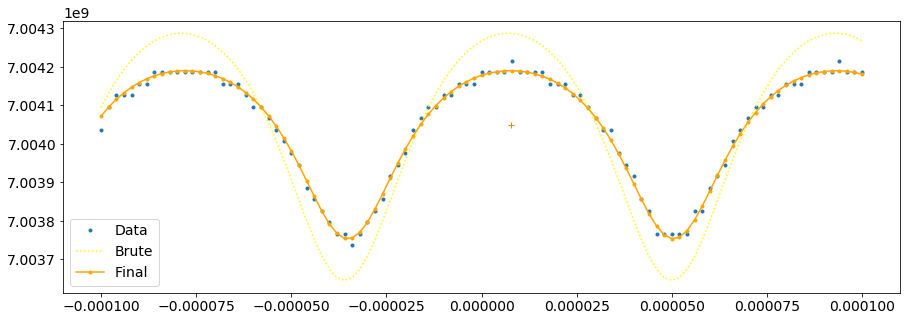

In [80]:
result_below = ao_below.launch()
result_above = ao_above.launch()

In [109]:
result_above, result_below

((array([7.00451107e+09, 2.70398486e+07, 8.56208038e-05, 7.65910481e-06,
         9.28266203e+09, 7.36910026e-01]), 0.010924879203737758),
 (array([ 7.00152052e+09,  1.18588054e+08,  8.55910486e-05,  7.66425672e-06,
          1.75473255e+09, -1.46086016e-01]), 0.013687107476708517))

/home/gleb/py36/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py:1201: UserWarning: 'STIX-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


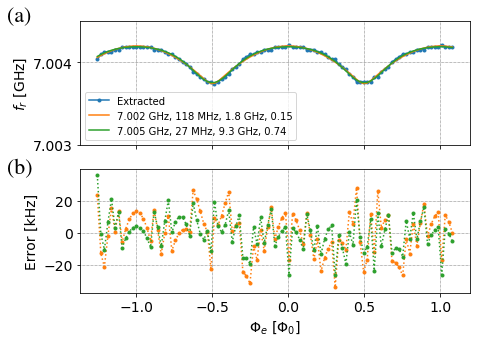

In [153]:
plt.subplot2grid((2, 1), (0, 0), rowspan=1, colspan=1)

x = (ao_below._res_points[:,0]-result_above[0][3])/result_above[0][2]

plot(x, ao_below._res_points[:,1]/1e9, marker=".", linestyle="-", label="Extracted");
plot(x, ao_below._model_fast(ao_below._res_points[:,0],
     ao_below._opt_params)/1e9, linestyle="-", 
     label=r"7.002 GHz, 118 MHz, 1.8 GHz, 0.15")

plot(x, ao_below._model_fast(ao_above._res_points[:,0],
     ao_above._opt_params)/1e9, linestyle="-",
     label=r"7.005 GHz, 27 MHz, 9.3 GHz, 0.74")

plt.gca().set_xticklabels([])


plt.ylabel("$f_r$ [GHz]")
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=0.001))
plt.ylim(7.003, 7.0045)

plt.grid()
plt.legend(fontsize=10)

plt.text(-1.85, 7.0045, "(a)", fontdict={"name":"STIX"}, fontsize=22)


plt.subplot2grid((2, 1), (1, 0), rowspan=1, colspan=1)


plot(x, ao_below._model_fast(ao_below._res_points[:,0],
                             ao_below._opt_params)/1e3-ao_below._res_points[:,1]/1e3, "C1", 
                             marker=".", linestyle=":", label="")
plot(x, ao_below._model_fast(ao_above._res_points[:,0],
                             ao_above._opt_params)/1e3-ao_below._res_points[:,1]/1e3, "C2", marker=".", linestyle=":")

# plt.xlim(-.75,.75)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
# plt.gca().set_xticklabels([])

plt.ylabel("Error [kHz]")


plt.text(-1.85, 37, "(b)", fontdict={"name":"STIX"}, fontsize=22)

plt.xlabel("$\Phi_e$ [$\Phi_0$]")


plt.grid()
plt.gcf().set_size_inches(7,5)
plt.savefig("../Pictures/alternative_fits.pdf", bbox_inches="tight")